# モデルの評価

## カテゴリの分類精度


In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data[:100, :], iris.target[:100]
# 学習データセット、テストデータセットに分割
X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, random_state=123)
# SVMのインスタンス化
svc = SVC()
# SVMで学習
svc.fit(X_train, y_train)
# テストデータセットの予測
y_pred = svc.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
# 適合率、再現率、F値を出力
# precision=適合率, recall=再現率, f1-score=F値, support=サポート数
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 混合行列

![混合行列](img/image.png)

### 適合率
陽性と予測したうちの実際に陽性だった割合
#### 計算式
適合率 = TP / (TP + FP)

### 再現率
実際に陽性だったものを陽性と予測できた割合
#### 計算式
再現率 = TP / (TP + FN)

### F値
適合率と再現率の調和平均
#### 計算式
F値 = 2 * (適合率 * 再現率) / (適合率 + 再現率)

### 交差検証

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# サポートベクタマシンをインスタンス化
svc = SVC()
# 10分割の交差検証を実行
# 適合率を計算
cross_val_score(svc, X, y, cv=10, scoring="precision")

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
# サポートベクタマシンをインスタンス化
svc = SVC()
# 10分割の交差検証を実行
# 適合率を計算
cross_val_score(svc, X, y, cv=10, scoring="recall")

## 予測確率の正確さ


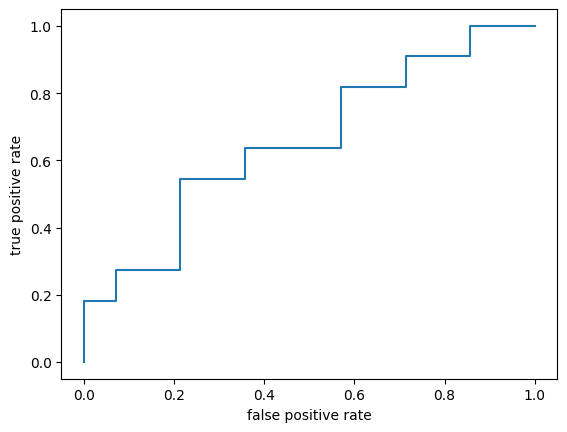

In [5]:
import numpy as np
import matplotlib.pyplot as plt
# 偽陽性率と真陽性率を算出
fpr = np.array([0, 0, 0, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 6,
                7, 8, 8, 8, 9, 10, 10, 11, 12, 12, 13, 14])/14
tpr = np.array([0, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 7, 7,
                7, 7, 8, 9, 9, 9, 10, 10, 10, 11, 11, 11])/11
# ROC曲線をプロット
fig, ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
plt.show()